In [104]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot  as plt


# data preprocessing

In [105]:

dataset = datasets.make_regression(n_samples=1000,n_features=1,noise=10,random_state=1)
x_train ,y_train = dataset

X = torch.from_numpy(x_train.astype(np.float32))
Y = torch.from_numpy(y_train.astype(np.float32))


In [106]:
X.shape,Y.shape

(torch.Size([1000, 1]), torch.Size([1000]))

In [107]:
Y = Y.view(-1,1)
Y.shape

torch.Size([1000, 1])

# Designing Model

In [108]:
model = nn.Linear(in_features=1,out_features=1)

# defining Loss and Criterian

In [109]:
#loss
loss = nn.MSELoss()

# criterian or optimizer
learning_rate = 0.01
criterian = torch.optim.SGD(model.parameters(),lr=learning_rate)



# Training loop

In [110]:
iterations = 1000

for epoch in range(iterations):

    y_predic = model(X)

    l = loss(Y,y_predic)

    l.backward()

    criterian.step()

    criterian.zero_grad()

    if epoch % 10 == 0:
        parameters = model.parameters()
        print(f"------------------- epoch {epoch + 1 } --------------------")

        print(f"loss : {l:0.3f} ----- parameters:")
        i = 1
        for params in parameters:
            print(f"param {i}: {params.item():0.03f}")
            
            i = i +1

------------------- epoch 1 --------------------
loss : 1468.795 ----- parameters:
param 1: 1.583
param 2: -0.708
------------------- epoch 11 --------------------
loss : 1026.188 ----- parameters:
param 1: 8.115
param 2: -0.286
------------------- epoch 21 --------------------
loss : 726.910 ----- parameters:
param 1: 13.489
param 2: 0.017
------------------- epoch 31 --------------------
loss : 524.491 ----- parameters:
param 1: 17.910
param 2: 0.229
------------------- epoch 41 --------------------
loss : 387.546 ----- parameters:
param 1: 21.548
param 2: 0.374
------------------- epoch 51 --------------------
loss : 294.872 ----- parameters:
param 1: 24.542
param 2: 0.469
------------------- epoch 61 --------------------
loss : 232.141 ----- parameters:
param 1: 27.006
param 2: 0.526
------------------- epoch 71 --------------------
loss : 189.668 ----- parameters:
param 1: 29.033
param 2: 0.558
------------------- epoch 81 --------------------
loss : 160.902 ----- parameters:
para

# prediction plot

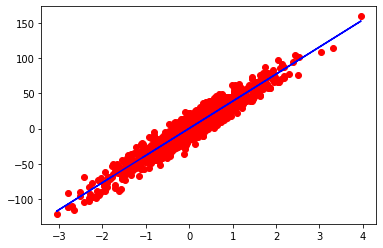

In [111]:
predicted = model(X).detach().numpy()
plt.plot(x_train,y_train,'ro')
plt.plot(x_train,predicted,'b')
plt.show()